### **Advantages of using logistic regression**

1. Logistic regression is easier to implement, interpret, and very efficient to train.
2. It not only provides a measure of how appropriate a predictor(coefficient size)is, but also its direction of association (positive or negative).
3. Good accuracy for many simple data sets and it performs well when the dataset is linearly separable.
4. Logistic regression is less inclined to over-fitting but it can overfit in high dimensional datasets.
5. The training time of logistic regression algorithm comes out to be far less than most complex algorithms, such as an Artificial Neural Network.

### **Disadvantages of using logistic regression**

1. If the number of observations is lesser than the number of features, Logistic Regression should not be used, otherwise, it may lead to overfitting.
2. Logistic Regression requires average or no multicollinearity between independent variables.
3. It is tough to obtain complex relationships using logistic regression. More powerful and compact algorithms such as Neural Networks can easily outperform this algorithm.
4. In Linear Regression independent and dependent variables are related linearly. But Logistic Regression needs that independent variables are linearly related to the log odds (log(p/(1-p)).

# **We need to predict if an Employee will get promoted or not**

**Reading the dataset**

In [ ]:
import pandas as pd


In [4]:
data = pd.read_csv('HR_Data.csv')

**Importing Libraries**

In [5]:
import numpy as np
import pandas as pd
#Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#We will use sklearn for building logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve
from warnings import simplefilter
import statsmodels.api as sm
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [6]:
#!pip install sklearn.utils.testing

**Building Data Understanding**

In [9]:
#shape of dataset
print("shape of dataframe is : ", data.shape)

shape of dataframe is :  (54808, 14)


In [11]:
# summary of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [12]:
#Get Statistical details of data
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [ ]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


**Data Cleaning**

In [13]:
#Drop employee_id column as it is just a unique id
data.drop("employee_id",inplace=True,axis=1)

In [14]:
#checking number of null values
data.isnull().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [ ]:
#Checking null percentage
data.isnull().mean()*100

department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [16]:
#fill missing value
#We will fill previous uear rating iwth "0" if not present (One can fill with anything else as well based on their undertsanding of data)
data["previous_year_rating"]= data["previous_year_rating"].fillna(0)

#change type to int
data["previous_year_rating"]= data["previous_year_rating"].astype("int")

In [17]:
#Find out mode value for education
data["education"].mode()

0    Bachelor's
Name: education, dtype: object

In [18]:
#fill missing value with mode
data["education"]= data["education"].fillna("Bachelor's")

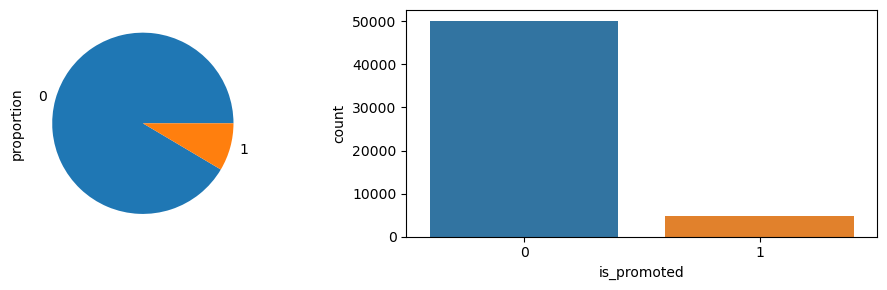

In [19]:
# chart for distribution of target variable
# (One can use any visualization or chart type he/she is comfortable with)
fig= plt.figure(figsize=(10,3) )
fig.add_subplot(1,2,1)
a= data["is_promoted"].value_counts(normalize=True).plot.pie()
fig.add_subplot(1,2,2)
churnchart=sns.countplot(x=data["is_promoted"])
plt.tight_layout()
plt.show()

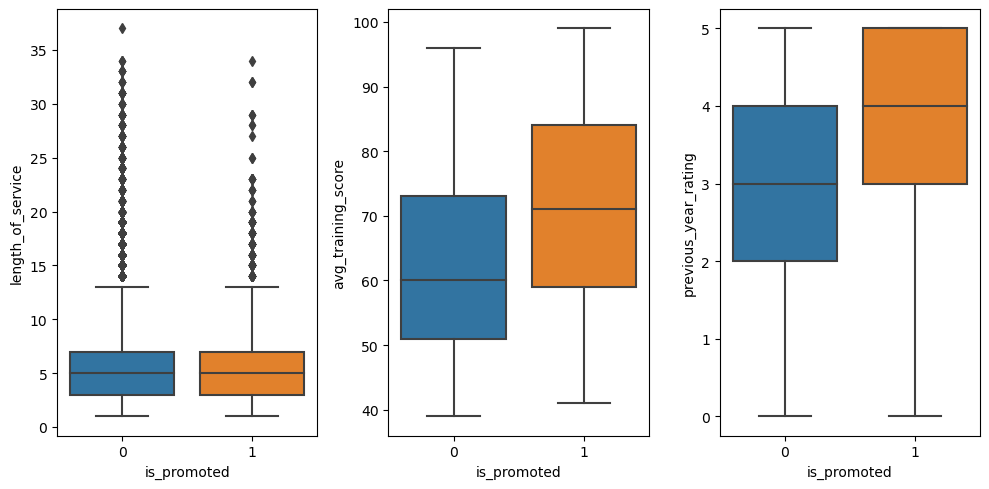

In [20]:
# Visualize relationship between promoted and other features
fig= plt.figure(figsize=(10,5) )
fig.add_subplot(1,3,1)
ar_6=sns.boxplot(x=data["is_promoted"],y=data["length_of_service"])
fig.add_subplot(1,3,2)
ar_6=sns.boxplot(x=data["is_promoted"],y=data["avg_training_score"])
fig.add_subplot(1,3,3)
ar_6=sns.boxplot(x=data["is_promoted"],y=data["previous_year_rating"])
plt.tight_layout()
plt.show()

In [27]:
data_numeric = data.select_dtypes(include=['int64', 'float64'])
data_numeric.corr().round(2)   

,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
no_of_trainings,1.00,-0.08,-0.06,-0.05,-0.01,0.04,-0.02
age,-0.08,1.00,0.66,-0.03,-0.01,-0.05,-0.02
length_of_service,-0.06,0.66,1.00,-0.08,-0.04,-0.04,-0.01
KPIs_met >80%,-0.05,-0.03,-0.08,1.00,0.10,0.08,0.22
awards_won?,-0.01,-0.01,-0.04,0.10,1.00,0.07,0.20
avg_training_score,0.04,-0.05,-0.04,0.08,0.07,1.00,0.18
is_promoted,-0.02,-0.02,-0.01,0.22,0.20,0.18,1.00


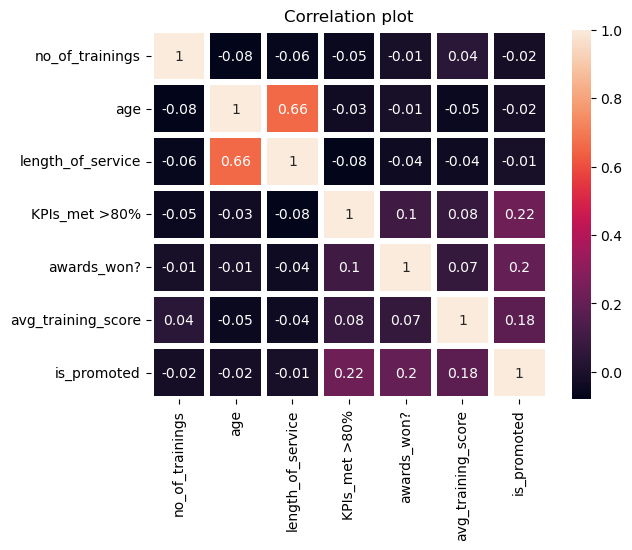

In [29]:
#correlation between features
corr_plot = sns.heatmap(data_numeric.corr().round(2),annot = True,linewidths=3 )
plt.title("Correlation plot")
plt.show()

#Age and leght of service are correlated (Though not a very strong correlation)

In [22]:
#list of other categorical variables
categorical_cols = data.select_dtypes(["object"]).columns
categorical_cols

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

In [30]:
#Create dummy variables
ds=pd.get_dummies(data[categorical_cols],drop_first=True)
ds.head()

,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_10,region_region_11,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,True,False,False,True
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,True
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [31]:
#concat newly created columns with original dataframe
data=pd.concat([data,ds],axis=1)
#Drop original columns
data.drop(categorical_cols,axis=1,inplace=True)

**Splitting Data into test and train**

In [32]:
from sklearn.model_selection import train_test_split
#split data into dependent variables(X) and independent variable(y) that we would predict
Y = data.pop("is_promoted")
X = data

In [33]:
#Let’s split X and y using Train test split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.8,random_state=42)
#get shape of train and test data
print("train size X : ",X_train.shape)
print("train size y : ",Y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",Y_test.shape)

train size X :  (43846, 53)
train size y :  (43846,)
test size X :  (10962, 53)
test size y :  (10962,)


In [34]:
#check for distribution of labels
#Our 91% of data is "not promoted" while "9%" oif data is of employees who are promoted
Y_train.value_counts(normalize=True)

is_promoted
0    0.914245
1    0.085755
Name: proportion, dtype: float64

In [35]:
#check for distribution of labels
Y_train.value_counts()

#Unbalanced classification problem

is_promoted
0    40086
1     3760
Name: count, dtype: int64

In [36]:
#import library
from sklearn.linear_model import LogisticRegression
#make instance of model with default parameters except class weight
#as we will add class weights due to class imbalance problem
#lr_basemodel =LogisticRegression(class_weight={0:0.1,1:0.9})
lr_basemodel =LogisticRegression()
# train model to learn relationships between input and output variables
lr_basemodel.fit(X_train,Y_train)

LogisticRegression()

[[10002    52]
 [  802   106]]


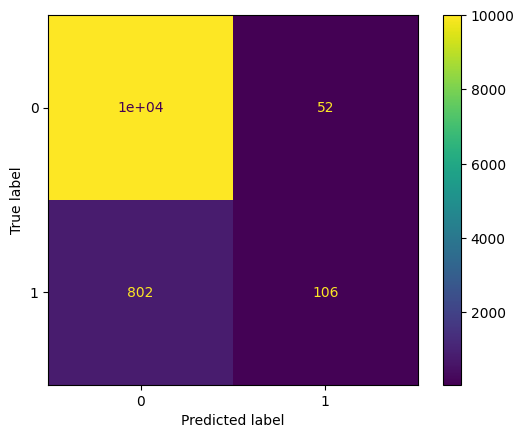

In [ ]:
y_pred_test = lr_basemodel.predict(X_test)
ConfusionMatrix = confusion_matrix(Y_test, y_pred_test)
print(ConfusionMatrix)

disp = ConfusionMatrixDisplay(confusion_matrix=ConfusionMatrix, display_labels=lr_basemodel.classes_)
disp.plot()
plt.show()

#Change it from column to rows

In [ ]:
 #Accuracy score
print("Accuracy score  test dataset:  t", accuracy_score(Y_test,y_pred_test))
#Precision score
print("precision score  test dataset:  t", precision_score(Y_test,y_pred_test))
#Recall Score
print("Recall score  test dataset:  t", recall_score(Y_test,y_pred_test))

Accuracy score  test dataset:  t 0.9220945083014048
precision score  test dataset:  t 0.6708860759493671
Recall score  test dataset:  t 0.11674008810572688


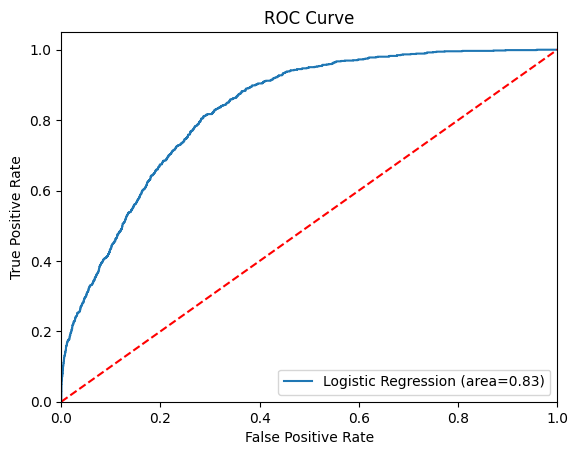

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test, lr_basemodel.predict_proba(X_test)[:,1])
auc_var=auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression (area=%0.2f)' % auc_var)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# **Giving Different Weight to each Class**

In [ ]:
#import library
from sklearn.linear_model import LogisticRegression
#make instance of model with default parameters except class weight
#as we will add class weights due to class imbalance problem
lr_diff_weight_model =LogisticRegression(class_weight={0:1,1:10})
# train model to learn relationships between input and output variables
lr_diff_weight_model.fit(X_train,Y_train)

LogisticRegression(class_weight={0: 1, 1: 10})

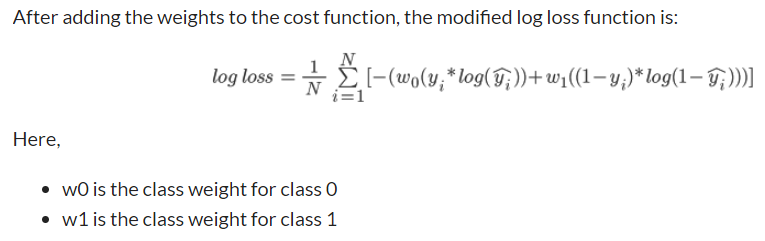

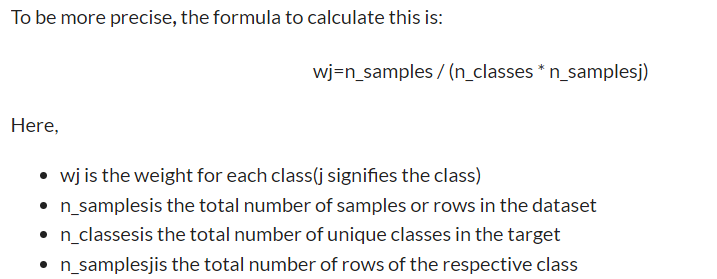

[[7422 2632]
 [ 207  701]]


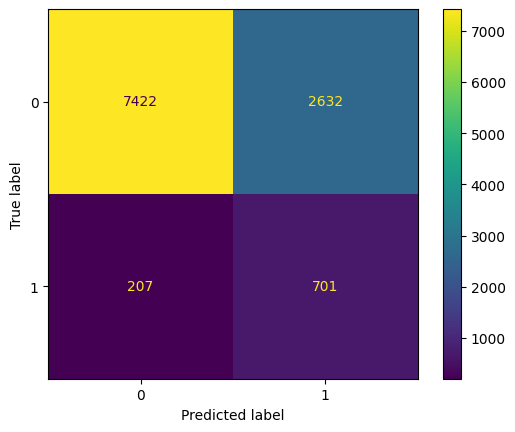

In [ ]:
y_pred_test = lr_diff_weight_model.predict(X_test)
ConfusionMatrix = confusion_matrix(Y_test, y_pred_test)
print(ConfusionMatrix)

disp = ConfusionMatrixDisplay(confusion_matrix=ConfusionMatrix, display_labels=lr_diff_weight_model.classes_)
disp.plot()
plt.show()

In [ ]:
# create onfusion matrix
y_pred_prob_test = lr_diff_weight_model.predict_proba(X_test)[:, 1]
y_pred_test = lr_diff_weight_model.predict(X_test)

In [ ]:
#Accuracy score
print("Accuracy score  test dataset:  t", accuracy_score(Y_test,y_pred_test))
#Precision score
print("precision score  test dataset:  t", precision_score(Y_test,y_pred_test))
#Recall Score
print("Recall score  test dataset:  t", recall_score(Y_test,y_pred_test))

Accuracy score  test dataset:  t 0.7410144134282065
precision score  test dataset:  t 0.21032103210321032
Recall score  test dataset:  t 0.7720264317180616


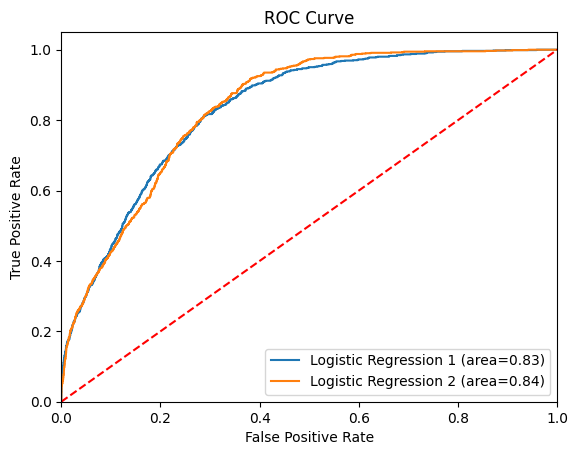

In [ ]:
fpr_2, tpr_2, thresholds_2 = roc_curve(Y_test, lr_diff_weight_model.predict_proba(X_test)[:,1])
auc_var_2=auc(fpr_2, tpr_2)

plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression 1 (area=%0.2f)' % auc_var)
plt.plot(fpr_2,tpr_2,label='Logistic Regression 2 (area=%0.2f)' % auc_var_2)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
logit_model = sm.Logit(Y_train, X_train)
logistic_results = logit_model.fit()

         Current function value: 0.249499
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print(logistic_results.summary2())

                                    Results: Logit
Model:                      Logit                   Method:                  MLE       
Dependent Variable:         is_promoted             Pseudo R-squared:        0.147     
Date:                       2023-10-08 05:27        AIC:                     21985.0599
No. Observations:           43846                   BIC:                     22445.5471
Df Model:                   52                      Log-Likelihood:          -10940.   
Df Residuals:               43793                   LL-Null:                 -12830.   
Converged:                  0.0000                  LLR p-value:             0.0000    
No. Iterations:             35.0000                 Scale:                   1.0000    
---------------------------------------------------------------------------------------
                              Coef.    Std.Err.     z     P>|z|     [0.025     0.975]  
---------------------------------------------------------------------